In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import linear_model as lm
from sklearn.cross_validation import cross_val_score
%matplotlib inline

In [131]:
data = pd.read_csv('data/comments.csv.gz')

In [132]:
data.shape

(177508, 3)

In [133]:
data.is_gum.value_counts()

0.0    90054
1.0    87454
Name: is_gum, dtype: int64

### Length of comments (symbols)

In [171]:
lenghts_symb = np.array([len(m) for m in data.text.values])

In [172]:
lenghts_symb.mean(), np.median(lenghts_symb)

(77.020765261283998, 47.0)

In [173]:
min(lenghts_symb), max(lenghts_symb)

(1, 9947)

In [174]:
sum(lenghts_symb)

13671802

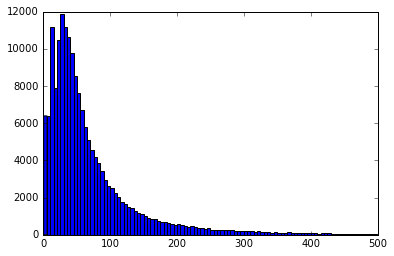

In [178]:
plt.hist(lenghts_symb[lenghts_symb < 500], bins=100);

In [223]:
print('{:.2f}% of comments are shorter than {} symbols'
      .format(lenghts_symb[lenghts_symb < 500].shape[0] / lenghts_symb.shape[0] * 100, 500))

99.03% of comments are shorter than 500 symbols


In [231]:
print('{:.2f}% of comments are longer than {} symbols'
      .format(lenghts_symb[lenghts_symb > 20].shape[0] / lenghts_symb.shape[0] * 100, 15))

82.06% of comments are longer than 15 symbols


### Length of comments (words)

In [179]:
lenghts_word = np.array([len(m.split()) for m in data.text.values])

In [180]:
lenghts_word.mean(), np.median(lenghts_word)

(11.436002884377043, 7.0)

In [181]:
min(lenghts_word), max(lenghts_word)

(1, 1612)

In [182]:
sum(lenghts_word)

2029982

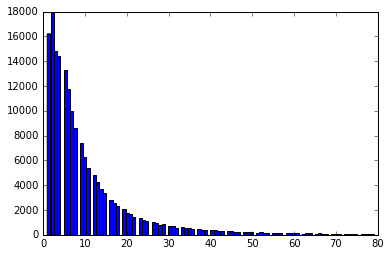

In [201]:
plt.hist(lenghts_word[lenghts_word < 80], bins=100);

In [203]:
print('{:.2f}% of comments are shorter than {} words'
      .format(lenghts_word[lenghts_word < 80].shape[0] / lenghts_word.shape[0] * 100, 80))

99.04% of comments are shorter than 80 words


In [276]:
print('{:.2f}% of comments are longer than {} words'
      .format(lenghts_word[lenghts_word > 3].shape[0] / lenghts_word.shape[0] * 100, 3))

72.41% of comments are longer than 3 words


### Links

In [340]:
links = [m for m in data.text.values if 'http' in m or 'www' in m or '.ru' in m or '.com' in m] 

In [341]:
links[:5]

['[id99906417|Илья], http://prostitutki-voronezha.info/',
 'Вот, как раз на эту тему http://s02.yapfiles.ru/files/531066/SHkala_masshtabov_Vselennoy_v.2.swf Про масштабы вселенной, админы проигнорили мой пост, видимо про котят интереснее.....',
 'Она каким то образом пишет в вк? Значит у нее есть доступ к 2gis.ru',
 'http://www.zakonrf.info/koap/20.1/',
 'http://m.youtube.com/#/watch?feature=youtu.be&v=yfDOcUSLZ6o&desktop_uri=%2Fwatch%3Fv%3DyfDOcUSLZ6o%26feature%3Dyoutu.be\nДоставило, особенно комментарии. Спасители наши']

In [342]:
print('{:.2f}% of comments contain links'.format(len(links) / len(data) * 100))

0.56% of comments contain links


## Baseline model

In [254]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(data.text.values)
y = data.is_gum.values

In [255]:
lr = lm.LogisticRegression()

In [256]:
np.random.seed(0)

In [257]:
baseline_scores = cross_val_score(lr, X, y, cv=5)
baseline_scores.mean(), baseline_scores.std()

(0.52110331732947401, 0.014491972083724441)

In [263]:
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [264]:
lr.score(X, y)

0.64823557248124031

In [265]:
lr.coef_.argmax()

1084

In [266]:
vectorizer.get_feature_names()[1084]

'yulya'

## Preprocessing

In [309]:
comments = data[(lenghts_word < 80) & (lenghts_word > 3)]

In [310]:
comments.shape

(126821, 3)

In [311]:
comments_lenghts = np.array([len(m) for m in comments.text.values])

In [312]:
comments_lenghts.argsort()[:10]

array([68692, 11304, 11314, 79553, 10001, 12532, 12533, 12767, 12978, 12551])

In [322]:
comments.text.values[12551]

'👍 👍 👍 😍'

In [323]:
comments.is_gum.value_counts()

0.0    65268
1.0    61553
Name: is_gum, dtype: int64

In [339]:
comments.text.values[102:104]

array([ '[id168803274|Артём], воооот) а у меня батя дальнобойщик. Я не понаслышке знаю что такое груженый тягач) в общем, мы друг друга поняли!)',
       '[id13014907|Сергей], когда воздух уходит из системы- машина растормаживается, т.е. все колёса блокируются. Тормоза на новых тягачах не отказывают. Это вам не КрАЗ'], dtype=object)

In [338]:
[t.split() for t in comments.text.values[102:104]]

[['[id168803274|Артём],',
  'воооот)',
  'а',
  'у',
  'меня',
  'батя',
  'дальнобойщик.',
  'Я',
  'не',
  'понаслышке',
  'знаю',
  'что',
  'такое',
  'груженый',
  'тягач)',
  'в',
  'общем,',
  'мы',
  'друг',
  'друга',
  'поняли!)'],
 ['[id13014907|Сергей],',
  'когда',
  'воздух',
  'уходит',
  'из',
  'системы-',
  'машина',
  'растормаживается,',
  'т.е.',
  'все',
  'колёса',
  'блокируются.',
  'Тормоза',
  'на',
  'новых',
  'тягачах',
  'не',
  'отказывают.',
  'Это',
  'вам',
  'не',
  'КрАЗ']]

In [325]:
vectorizer = CountVectorizer(max_features=10000)
X = vectorizer.fit_transform(comments.text.values)
y = comments.is_gum.values

In [326]:
lr = lm.LogisticRegression()

In [327]:
np.random.seed(0)

In [328]:
baseline_scores = cross_val_score(lr, X, y, cv=5)
baseline_scores.mean(), baseline_scores.std()

(0.51575052181998049, 0.0094601383911264731)

In [329]:
lr.fit(X, y)
lr.score(X, y)

0.67170263599876989